<img src='https://raw.githubusercontent.com/fjvarasc/DSPXI/master/figures/py_logo.png' />

# DEMO NOTEBOOK

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#DEMO-NOTEBOOK" data-toc-modified-id="DEMO-NOTEBOOK-1">DEMO NOTEBOOK</a></span></li><li><span><a href="#Data-manipulation-with-numpy:-tips-and-tricks,-part-1" data-toc-modified-id="Data-manipulation-with-numpy:-tips-and-tricks,-part-1-2">Data manipulation with numpy: tips and tricks, part 1</a></span><ul class="toc-item"><li><span><a href="#1.-numpy.argsort" data-toc-modified-id="1.-numpy.argsort-2.1">1. numpy.argsort</a></span><ul class="toc-item"><li><span><a href="#Sorting-values-of-one-array-according-to-the-other" data-toc-modified-id="Sorting-values-of-one-array-according-to-the-other-2.1.1">Sorting values of one array according to the other</a></span></li><li><span><a href="#Computing-inverse-of-permutation" data-toc-modified-id="Computing-inverse-of-permutation-2.1.2">Computing inverse of permutation</a></span></li><li><span><a href="#Even-faster-inverse-permutation" data-toc-modified-id="Even-faster-inverse-permutation-2.1.3">Even faster inverse permutation</a></span></li><li><span><a href="#Computing-order-of-elements-in-array" data-toc-modified-id="Computing-order-of-elements-in-array-2.1.4">Computing order of elements in array</a></span></li><li><span><a href="#IronTransform-(flattener-of-distribution)" data-toc-modified-id="IronTransform-(flattener-of-distribution)-2.1.5">IronTransform (flattener of distribution)</a></span></li><li><span><a href="#How-IronTransform-works" data-toc-modified-id="How-IronTransform-works-2.1.6">How IronTransform works</a></span></li></ul></li><li><span><a href="#IronTransform-and-histogram-equalization" data-toc-modified-id="IronTransform-and-histogram-equalization-2.2">IronTransform and histogram equalization</a></span></li></ul></li><li><span><a href="#2.-Broadcasting,-numpy.newaxis" data-toc-modified-id="2.-Broadcasting,-numpy.newaxis-3">2. Broadcasting, numpy.newaxis</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Weighted-covariation-matrix" data-toc-modified-id="Weighted-covariation-matrix-3.0.1">Weighted covariation matrix</a></span></li><li><span><a href="#Pearson-correlation" data-toc-modified-id="Pearson-correlation-3.0.2">Pearson correlation</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.1">Conclusion</a></span></li></ul></li></ul></div>

# Data manipulation with numpy: tips and tricks, part 1

Some inobvious examples of what you can do with numpy are collected here.

Examples are mostly coming from area of machine learning, but will be useful if you're doing number crunching in python.

In [1]:
from __future__ import print_function # for python 2 & python 3 compatibility
%matplotlib inline
import numpy as np

## 1. numpy.argsort

### Sorting values of one array according to the other

Say, we want to order the people according to their age and their heights.

In [2]:
ages = np.random.randint(low=30, high=60, size=10)
heights = np.random.randint(low=150, high=210, size=10)

print(ages)
print(heights)

[46 30 52 30 50 37 45 37 39 38]
[189 186 193 176 203 154 152 190 168 164]


In [3]:
sorter = np.argsort(ages)
print(ages[sorter])
print(heights[sorter])

[30 30 37 37 38 39 45 46 50 52]
[186 176 154 190 164 168 152 189 203 193]


once you computed permutation, you can apply it many times - this is fast. 

Frequently to solve this problem people use sorted(zip(ages, heights)), which is much slower (10-20 times slower on large arrays).

### Computing inverse of permutation

permutations in numpy are simply arrays:

In [4]:
permutation = np.random.permutation(10)
original = np.array(list('abcdefghij'))

print(permutation)
print(original)
print(original[permutation])

[1 8 0 3 4 6 2 9 7 5]
['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j']
['b' 'i' 'a' 'd' 'e' 'g' 'c' 'j' 'h' 'f']


__Inverse permutation__ is computed using numpy.argsort (again!)

In [5]:
inverse_permutation = np.argsort(permutation)

print(original[permutation][inverse_permutation])

['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j']


__This is true because of two facts__:

1. indexing operation is associative (dramatically simple and interesting fact):
   ```
   a[b][c] = a[b[c]]
   ```
   provided that `a`, `b`, `c` are 1-dimensional arrays
   
2. `permutation[inverse_permutation] is identical permutation:

In [6]:
permutation[inverse_permutation]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Even faster inverse permutation

As was said, numpy.argsort returns inverse permutation, but it takes $O(n \log(n))$ time, while computing inverse permutation should take $O(n)$.

This optimal way can be written in numpy.

In [7]:
print(np.argsort(permutation))

inverse_permutation = np.empty(len(permutation), dtype=np.int)
inverse_permutation[permutation] = np.arange(len(permutation))
print(inverse_permutation)

[2 0 6 3 4 9 5 8 1 7]
[2 0 6 3 4 9 5 8 1 7]


### Computing order of elements in array

frequently it is important to compute order of each value in array. 

In other words, for each element in array we want to find the number of elements smaller than given.

In [8]:
data = np.random.random(10)

print(data)
print(np.argsort(np.argsort(data)))

[0.90123571 0.67487492 0.45917829 0.79331541 0.23023649 0.97744811
 0.38553851 0.93838383 0.39493114 0.11583801]
[7 5 4 6 1 9 2 8 3 0]


__NB:__ there is scipy function which does the same, but it's more general and faster, so prefer using it:

In [9]:
from scipy.stats import rankdata
rankdata(data) - 1

array([7., 5., 4., 6., 1., 9., 2., 8., 3., 0.])

### IronTransform (flattener of distribution)

Sometimes you need to write monotonic tranformation, which turns one distribution into uniform.

This method is useful to compare distributions or to work with distributions with heavy tails or strange shape.

In [10]:
class IronTransform:
    def fit(self, data, weights):
        weights = weights / weights.sum()
        sorter = np.argsort(data)
        self.x = data[sorter]
        self.y = np.cumsum(weights[sorter])
        return self
        
    def transform(self, data):
        return np.interp(data, self.x, self.y)

Let's apply __Iron__ transformation to data

In [11]:
sig_pred = np.random.normal(size=10000) + 1
bck_pred = np.random.normal(size=10000) - 1

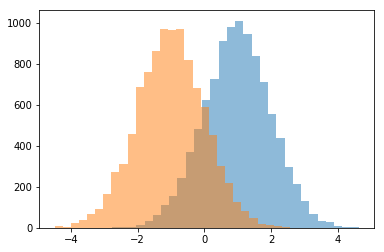

In [12]:
from matplotlib import pyplot as plt
plt.figure()
plt.hist(sig_pred, bins=30, alpha=0.5)
plt.hist(bck_pred, bins=30, alpha=0.5)
plt.show()

Now we can see that __IronTransform__ actually was able to turn signal distribution to uniform:

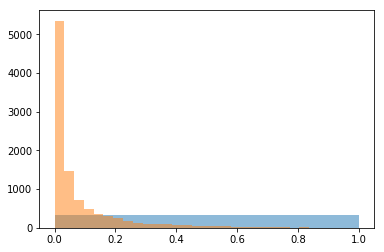

In [13]:
iron = IronTransform().fit(sig_pred, weights=np.ones(len(sig_pred)))

plt.figure()
plt.hist(iron.transform(sig_pred), bins=30, alpha=0.5)
plt.hist(iron.transform(bck_pred), bins=30, alpha=0.5)
plt.show()

### How IronTransform works

To turn any distribution into uniform, you should use mapping:
$x \to F(x)$, here $F(x)$ is cumulative distribution function. 

In other words, for each point $x$ we should compute the part of distribution to the left. 
This was done by summing all weights to this point using `numpy.cumsum` (we also had to normalize weights).

To use the learned mapping, linear interpolation (`numpy.interp`) was applied.
We can visualize this mapping:

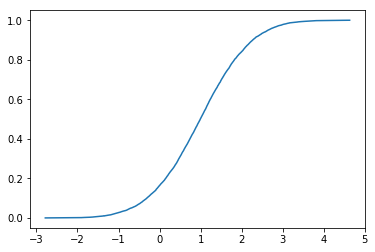

In [14]:
plt.plot(iron.x, iron.y)

## IronTransform and histogram equalization

The same method is applied in computer vision to 'improve' low-contrast images and called [histogram equalization](https://en.wikipedia.org/wiki/Histogram_equalization).

In [15]:
import requests
from io import BytesIO
from PIL import Image

res = requests.get('https://raw.githubusercontent.com/fjvarasc/DSPXI/master/figures/AquaTermi_lowcontrast.JPG')
image = np.array(Image.open(BytesIO(res.content)).convert('L'))

#image = np.array(Image.open('AquaTermi_lowcontrast.JPG').convert('L'))
flat_image = image.flatten()
result = IronTransform().fit(flat_image, weights=np.ones(len(flat_image))).transform(image)

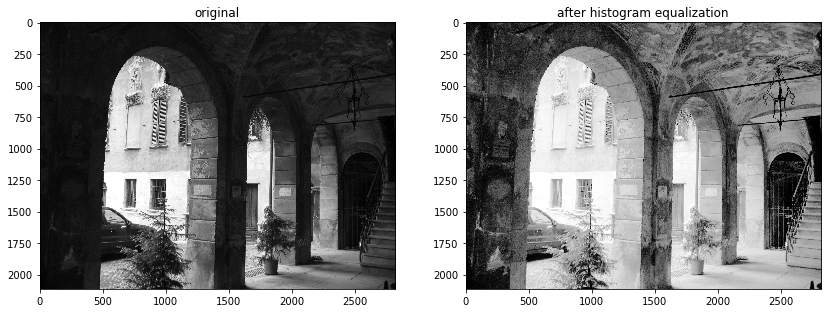

In [16]:
plt.figure(figsize=[14, 7])
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('original')
plt.subplot(122), plt.imshow(result, cmap='gray'), plt.title('after histogram equalization')
plt.show()

Also worth mentioning: to fight very small / large numbers, use `numpy.clip`. Simple and very handy:

In [17]:
np.clip([-100, -10, 0, 10, 100], a_min=-15, a_max=15)

array([-15, -10,   0,  10,  15])

In [18]:
x = np.arange(-5, 5)
print(x)
print(x.clip(0))

[-5 -4 -3 -2 -1  0  1  2  3  4]
[0 0 0 0 0 0 1 2 3 4]


# 2. Broadcasting, numpy.newaxis

[Broadcasting](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) is very useful trick, which simplifies many operations.

### Weighted covariation matrix
numpy has `cov` function, but it doesn't support weights of samples. Let's write our own covariation matrix.

Let $X_{ij}$ be the original data. $i$ is indexing samples, $j$ is indexing features.
$COV_{jk} = \sum_i X_{ij} w_i X_{ik}$

In [19]:
data = np.random.normal(size=[100, 5])
weights = np.random.random(100)

In [20]:
def covariation(data, weights):
    weights = weights / weights.sum()
    return data.T.dot(weights[:, np.newaxis] * data)

In [21]:
np.cov(data.T)

array([[ 1.03153925,  0.10944   , -0.23482975,  0.0342691 ,  0.03844112],
       [ 0.10944   ,  0.92123955,  0.02117525,  0.02831306, -0.02798825],
       [-0.23482975,  0.02117525,  1.21828662,  0.13568747, -0.14265189],
       [ 0.0342691 ,  0.02831306,  0.13568747,  1.05427679, -0.08848685],
       [ 0.03844112, -0.02798825, -0.14265189, -0.08848685,  1.32805345]])

In [22]:
covariation(data, np.ones(len(data)))

array([[ 1.02123982,  0.1080078 , -0.23252653,  0.03352186,  0.03826264],
       [ 0.1080078 ,  0.91917723,  0.02191763,  0.03659268, -0.03206723],
       [-0.23252653,  0.02191763,  1.20623108,  0.13547325, -0.14180704],
       [ 0.03352186,  0.03659268,  0.13547325,  1.05398856, -0.09282205],
       [ 0.03826264, -0.03206723, -0.14180704, -0.09282205,  1.31743019]])

In [23]:
covariation(data, weights)

array([[ 9.95939782e-01,  2.12237112e-01, -7.74904267e-02,
         7.49398972e-02, -6.74949890e-04],
       [ 2.12237112e-01,  8.59899075e-01,  9.67264169e-02,
         9.03858553e-02,  1.51215110e-02],
       [-7.74904267e-02,  9.67264169e-02,  1.05993160e+00,
         1.32460680e-01, -1.53046932e-01],
       [ 7.49398972e-02,  9.03858553e-02,  1.32460680e-01,
         1.03940308e+00,  6.10921871e-02],
       [-6.74949890e-04,  1.51215110e-02, -1.53046932e-01,
         6.10921871e-02,  1.29129583e+00]])

alternative way to do this is via `numpy.einsum`:

In [24]:
np.einsum('ij, ik, i -> jk', data, data, weights / weights.sum())

array([[ 9.95939782e-01,  2.12237112e-01, -7.74904267e-02,
         7.49398972e-02, -6.74949890e-04],
       [ 2.12237112e-01,  8.59899075e-01,  9.67264169e-02,
         9.03858553e-02,  1.51215110e-02],
       [-7.74904267e-02,  9.67264169e-02,  1.05993160e+00,
         1.32460680e-01, -1.53046932e-01],
       [ 7.49398972e-02,  9.03858553e-02,  1.32460680e-01,
         1.03940308e+00,  6.10921871e-02],
       [-6.74949890e-04,  1.51215110e-02, -1.53046932e-01,
         6.10921871e-02,  1.29129583e+00]])

### Pearson correlation

One more example of broadcasting: computation of Pearson coefficient.


In [25]:
np.corrcoef(data.T)

array([[ 1.        ,  0.11226566, -0.20947659,  0.03286113,  0.03284319],
       [ 0.11226566,  1.        ,  0.01998791,  0.02872918, -0.02530356],
       [-0.20947659,  0.01998791,  1.        ,  0.11972578, -0.1121489 ],
       [ 0.03286113,  0.02872918,  0.11972578,  1.        , -0.07478141],
       [ 0.03284319, -0.02530356, -0.1121489 , -0.07478141,  1.        ]])

In [26]:
def my_corrcoef(data, weights):
    data = data - np.average(data, axis=0, weights=weights)
    shifted_cov = covariation(data, weights)
    cov_diag = np.diag(shifted_cov)
    return shifted_cov / np.sqrt(cov_diag[:, np.newaxis] * cov_diag[np.newaxis, :])

my_corrcoef(data, np.ones(len(data)))

array([[ 1.        ,  0.11226566, -0.20947659,  0.03286113,  0.03284319],
       [ 0.11226566,  1.        ,  0.01998791,  0.02872918, -0.02530356],
       [-0.20947659,  0.01998791,  1.        ,  0.11972578, -0.1121489 ],
       [ 0.03286113,  0.02872918,  0.11972578,  1.        , -0.07478141],
       [ 0.03284319, -0.02530356, -0.1121489 , -0.07478141,  1.        ]])

## Conclusion

Many things can be written in numpy in efficient way, moreover resulting code will be short and
 more readable. 

But this skill requires much practice.